In [3]:

from numpy.random import seed
seed(888)
import tensorflow as tf
tf.random.set_seed(404)

# Imports

In [4]:
import os
import numpy as np
import keras
import tensorflow as tf


Using TensorFlow backend.


In [45]:
from keras.datasets import cifar10
from IPython.display import display
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
%matplotlib inline

# constant(label names)

In [91]:
LABEL_NAMES=['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
IMAGE_WIDTH=32
IMAGE_HEIGHT=32
IMAGE_PIXELS=IMAGE_HEIGHT*IMAGE_WIDTH
IMAGE_CHANNEL=3
TOTAL_INPUTS=IMAGE_PIXELS*3

VALIDATION_SIZE=10000
SMALL_TRAINING_SIZE=1000

In [6]:
type(cifar10)

module

# load dataset

In [8]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [9]:
type(X_train)

numpy.ndarray

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
X_train[1].shape

(32, 32, 3)

# displaying image using ipython

In [36]:
pic_array = X_train[7]

In [37]:
pic=array_to_img(pic_array)

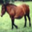

In [38]:
display(pic)

In [39]:
y_train.shape

(50000, 1)

In [40]:
y_train[7][0]

7

In [41]:
LABEL_NAMES[y_train[7][0]]

'Horse'

# Display Image using matplotlib

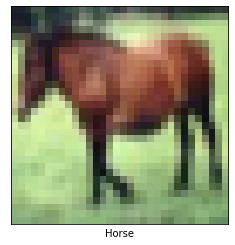

In [52]:
plt.imshow(X_train[7])
plt.xlabel(LABEL_NAMES[y_train[7][0]])  # as y_train shape is (50000, 1) we need first column(label values from 1-10)
plt.xticks([])
plt.yticks([])
plt.show()

# displaying 10 img in row 

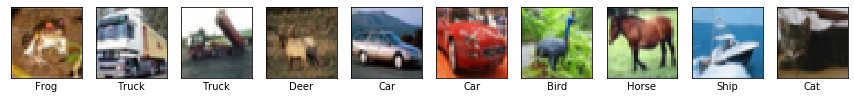

In [64]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(LABEL_NAMES[y_train[i][0]])

In [68]:
no_of_images,x,y,channels = X_train.shape
print(f'Total_images = {no_of_images} \t | width = {x} \t | height = {y} \t | channels = {channels}')

Total_images = 50000 	 | width = 32 	 | height = 32 	 | channels = 3


In [69]:
X_test.shape

(10000, 32, 32, 3)

# preprocess data

In [70]:
X_train.shape

(50000, 32, 32, 3)

In [75]:
type(X_train[0][0][0][0])   # total_number,width,height,channel

numpy.uint8

In [76]:
X_train,X_test= X_train/255.0 , X_test/255.0  #RGB max val = 255, reducing values between 0 to 1

In [77]:
type(X_train[0][0][0][0])

numpy.float64

In [85]:
X_train=X_train.reshape(len(X_train),TOTAL_INPUTS) #reducing shape of images (number,width,height,channel) to (number,combined input)

In [81]:
X_train.shape

(50000, 3072)

In [82]:
X_train[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

In [83]:
X_test=X_test.reshape(len(X_test),TOTAL_INPUTS)

In [84]:
X_test.shape

(10000, 3072)

# validation set

In [87]:
X_val=X_train[:VALIDATION_SIZE] #first 10000
y_val=y_train[:VALIDATION_SIZE]
X_val.shape

(10000, 3072)

In [90]:
X_training=X_train[VALIDATION_SIZE:]
y_training=y_train[VALIDATION_SIZE:]
X_training.shape


(40000, 3072)

# creating small dataset

In [92]:
X_test_small=X_training[:SMALL_TRAINING_SIZE]
y_test_small=y_training[:SMALL_TRAINING_SIZE]
X_test_small.shape

(1000, 3072)